In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_path = "../imgs/imgs_sel/"

In [339]:
image_path_1 = data_path + "tartaruga1A.JPG"
# image_path_2 = data_path + "tartaruga1B.JPG"
image_path_2 = data_path + "tartaruga2.JPG"

In [340]:
def treat_image(img):
    # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img_gray = cv2.GaussianBlur(img_gray, (7,7), 0)
    # img_gray = cv2.Canny(img_gray, 30, 130, 3, L2gradient = False)
    
    return img

In [341]:
img1 = cv2.imread(image_path_1)
input_image_1 = treat_image(img1)

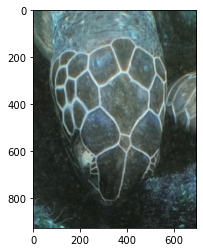

In [342]:
plt.imshow(input_image_1, cmap="gray")

In [343]:
img2 = cv2.imread(image_path_2)
input_image_2 = treat_image(img2)

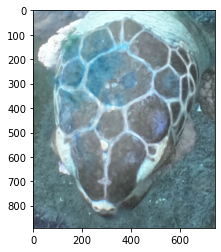

In [344]:
plt.imshow(input_image_2, cmap="gray")

In [345]:
sift = cv2.SIFT_create()

In [346]:
keypoints1, descriptors1 = sift.detectAndCompute(input_image_1, None)
keypoints2, descriptors2 = sift.detectAndCompute(input_image_2, None)

In [347]:
FLAN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [348]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [349]:
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

In [350]:
matchesMask = [[0,0] for i in range(len(matches))]

In [351]:
for i,(m1, m2) in enumerate (matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]

In [352]:
draw_params = dict(matchColor = (0,0,255), singlePointColor = (0,255,0), matchesMask = matchesMask, flags=2)

In [353]:
good_matches = []

for m1, m2 in matches:
    if m1.distance < 0.8 * m2.distance:
        good_matches.append([m1])

60


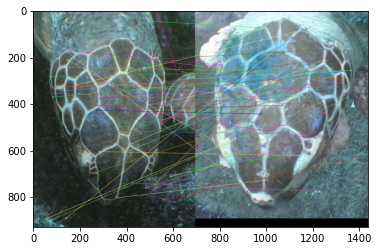

In [354]:
flann_matches = cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=2)
print(len(good_matches))
plt.imshow(flann_matches)